# EDA - A Simple Guide

This is an attempt to make a simple guide of the EDA process

## Exploratory data analysis - Data Science Guide

[link](https://datascienceguide.github.io/exploratory-data-analysis)

The purpose of EDA is to use summary statistics and visualizations to better understand data, and find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis. EDA is NOT about making fancy visualizations or even aesthetically pleasing ones, the goal is to try and answer questions with data. Your goal should be to be able to create a figure which someone can look at in a couple of seconds and understand what is going on. If not, the visualization is too complicated (or fancy) and something similar should be used.


For this article (and tutorial) on exploratory data analysis, we are going be investigating [Anscombe’s_quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet) and [Fisher’s Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

“Anscombe’s quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.” The Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements. It shows the variation of Iris flowers of three related species.

Examples of visualizations for numeric data are line charts with error bars, histograms, box and whisker plots, for categorical data bar charts and waffle charts, and for bivariate data are scatter charts or combination charts. The tutorial on exploratory data analysis goes over many of these visualizations.



### Visualization Methods - Univariate data (One variable)

The two visualizations used to describe univariate (1 variable) data is the box plot and the histogram. The box plot can be used to show the minimum, maximum, mean, median, quantiles and range.

![](http://stanford.edu/~mwaskom/software/seaborn/_images/horizontal_boxplot.png)


The histogram can be used to show the count, mode, variance, standard deviation, coefficient of deviation, skewness and kurtosis.


![](http://matplotlib.org/1.3.1/_images/histogram_demo_extended_00.png)

### Visualization Methods - Bivariate data (Two variables)

When plotting the relation between two variables, one can use a scatter plot.

![](http://matplotlib.org/_images/scatter_symbol.png)

If the data is time series or has an order, a line chart can be used.

![](http://matplotlib.org/_images/plotfile_demo_00.png)

### Visualization Methods - Multivariate data

When dealing with multiple variables, it is tempting to make three dimensional plots, but as show below it can be difficult to understand the data:

![](http://matplotlib.org/_images/scatter3d_demo.png)

Rather I recommend create a scatter plot of the relation between each variable:

![](http://stanford.edu/~mwaskom/software/seaborn/_images/scatterplot_matrix.png)


Combined charts also are great ways to visualize data, since each chart is simple to understand on its own.

![](http://matplotlib.org/_images/mri_with_eeg.png)

For very large dimensionality, you can reduce the dimensionality using principle component analysis, Latent Dirichlet allocation or other techniques and then make a plot of the reduced variables. This is particularly important for high dimensionality data and has applications in deep learning such as visualizing natural language or images.

### Visualization Methods - Text data

For example with Text data, one could create a world cloud, where the size of each word is the based on its frequency in the text. To remove the words which add noise to the dataset, the documents can be grouped using Topic modeling and only the important words can be displayed.


![](http://4.bp.blogspot.com/-cjfJLOPGjIg/UJmCmBa65tI/AAAAAAAAAJk/TF2qRh964GI/s400/constitution_.png)

Data visualization is a fun an very important part of being a data scientist. Simplicity and the ability for others to quickly understand a message is the most important part of exploratory data analysis. Before every building any model, make sure you create a visualization to understand the data first!

## Exploratory Data Analysis in R (introduction)

[link](https://blog.datascienceheroes.com/exploratory-data-analysis-in-r-intro/)

### Introduction


In this post we will review some functions that lead us to the analysis of the first case.

- Step 1 - First approach to data
- Step 2 - Analyzing categorical variables
- Step 3 - Analyzing numerical variables
- Step 4 - Analyzing numerical and categorical at the same time


Covering some key points in a basic EDA:

- Data types
- Outliers
- Missing values
- Distributions (numerically and graphically) for both, numerical and categorical variables.


### Type of analysis results

They can be two: informative or operative.

- Informative - For example plots, or any long variable summary. We cannot filter data from it, but give us a lot of information at once. Most used on the EDA stage.

- Operative - The results can be used to take an action directly on the data workflow (for example, selecting any variables whose percentage of missing values are below 20%). Most used in the Data Preparation stage.



In [2]:
install.packages("funModeling", dependencies = TRUE)

also installing the dependencies ‘bitops’, ‘checkmate’, ‘viridisLite’, ‘gtools’, ‘gdata’, ‘caTools’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘htmlTable’, ‘viridis’, ‘gplots’, ‘Hmisc’, ‘ROCR’, ‘gridExtra’, ‘pander’, ‘moments’, ‘entropy’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(funModeling) 
library(tidyverse) 
library(Hmisc)

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

funModeling v.1.6.8 :)
Examples and tutorials at livebook.datascienceheroes.com

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.2.0
✔ tibble  1.4.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()


### Creating the data for this example

Using the heart_disease data (from funModeling package). We will take only 4 variables for legibility.



In [2]:
data = heart_disease %>% select(age, max_heart_rate, thal, has_heart_disease)

In [3]:
head(data)

age,max_heart_rate,thal,has_heart_disease
63,150,6,no
67,108,3,yes
67,129,7,yes
37,187,3,no
41,172,3,no
56,178,3,no


In [4]:
# Getting the metrics about data types, zeros, infinite numbers, and missing values:

df_status(data)

           variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1               age       0       0    0 0.00     0     0 integer     41
2    max_heart_rate       0       0    0 0.00     0     0 integer     91
3              thal       0       0    2 0.66     0     0  factor      3
4 has_heart_disease       0       0    0 0.00     0     0  factor      2



- q_zeros: quantity of zeros (p_zeros: in percentage)

- q_na: quantity of NA (p_na: in percentage)

- type: factor or numeric

- unique: quantity of unique values

freq function runs for all factor or character variables automatically:

  thal frequency percentage cumulative_perc
1    3       166      54.79           54.79
2    7       117      38.61           93.40
3    6        18       5.94           99.34
4 <NA>         2       0.66          100.00



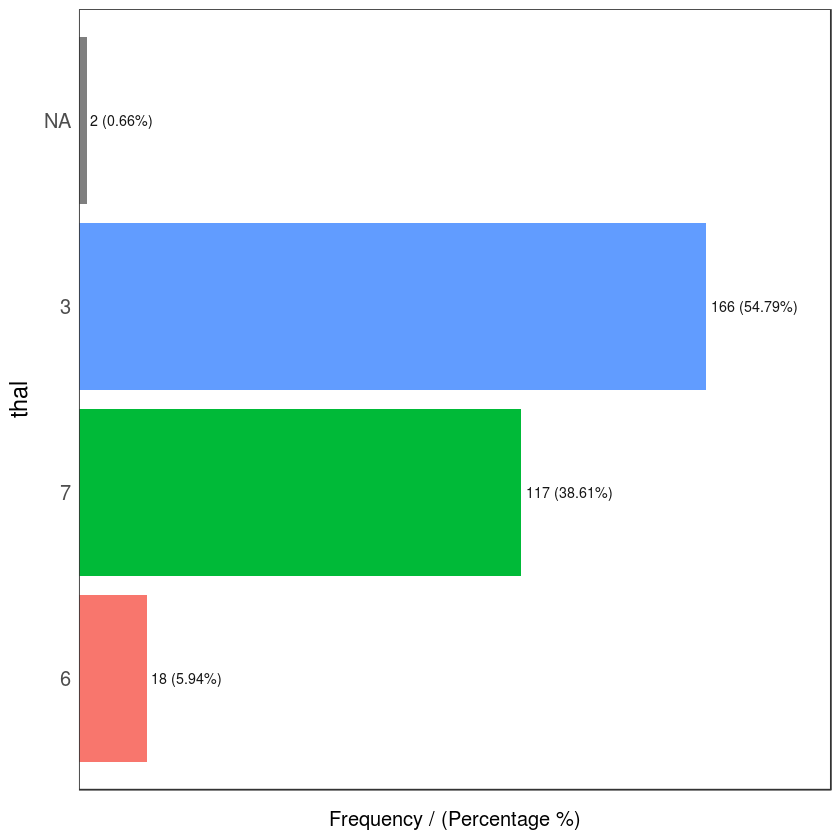

  has_heart_disease frequency percentage cumulative_perc
1                no       164      54.13           54.13
2               yes       139      45.87          100.00



[1] "Variables processed: thal, has_heart_disease"

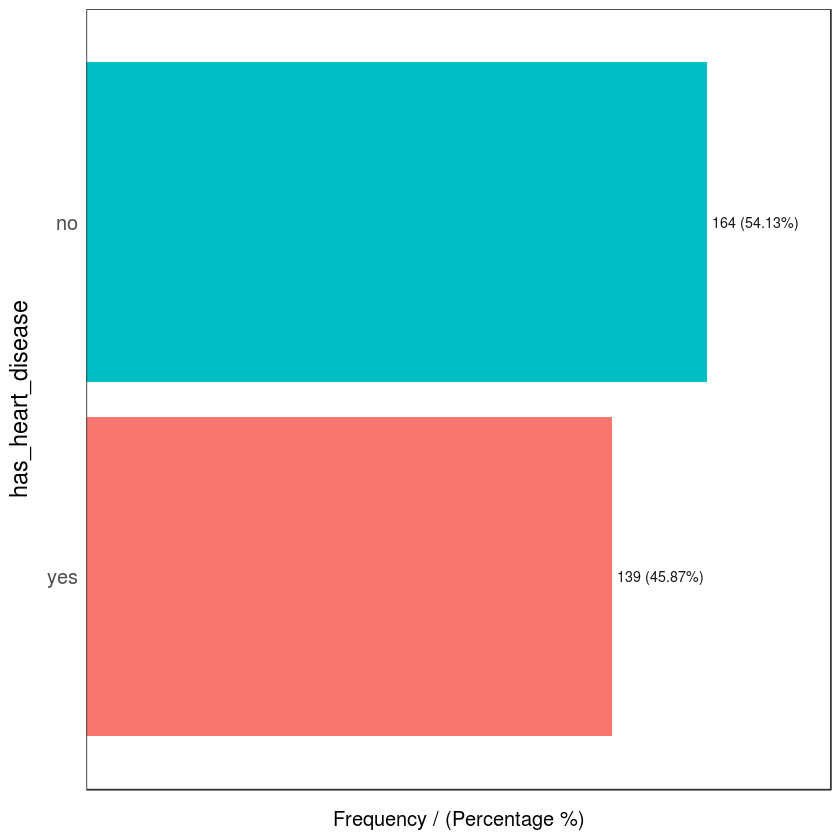

In [5]:
freq(data)

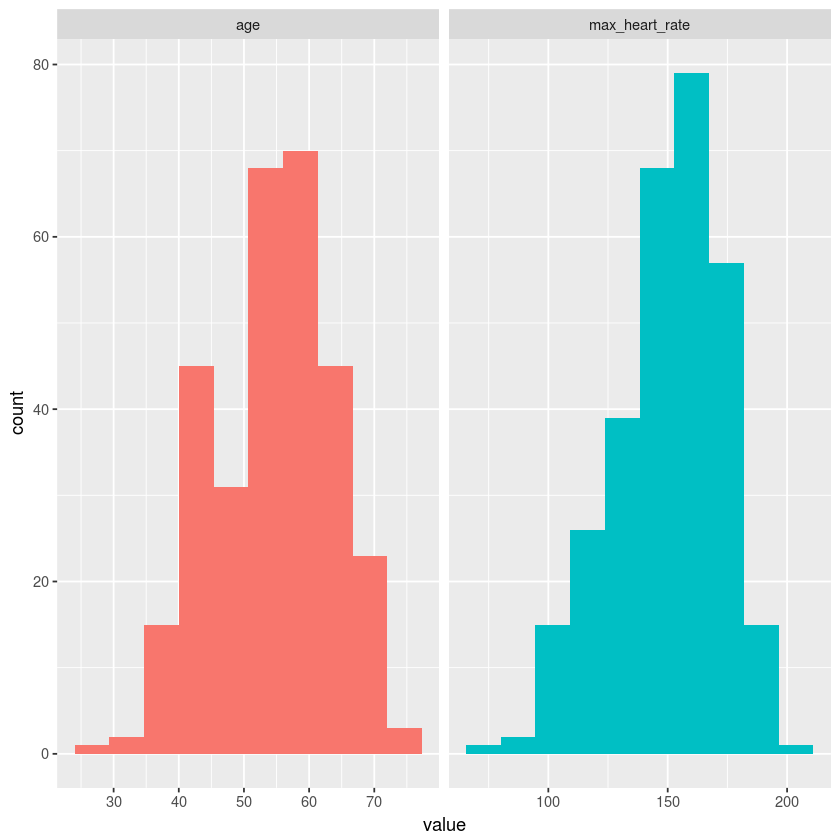

In [6]:
plot_num(data)


## R for Data Science - Exploratory Data Analysis

[link](https://r4ds.had.co.nz/exploratory-data-analysis.html)

EDA is not a formal process with a strict set of rules. More than anything, EDA is a state of mind. During the initial phases of EDA you should feel free to investigate every idea that occurs to you. Some of these ideas will pan out, and some will be dead ends. As your exploration continues, you will home in on a few particularly productive areas that you’ll eventually write up and communicate to others.


EDA is an important part of any data analysis, even if the questions are handed to you on a platter, because you always need to investigate the quality of your data. Data cleaning is just one application of EDA: you ask questions about whether your data meets your expectations or not. To do data cleaning, you’ll need to deploy all the tools of EDA: visualisation, transformation, and modelling.

### Questions

Your goal during EDA is to develop an understanding of your data. The easiest way to do this is to use questions as tools to guide your investigation. When you ask a question, the question focuses your attention on a specific part of your dataset and helps you decide which graphs, models, or transformations to make.

EDA is fundamentally a creative process. And like most creative processes, the key to asking quality questions is to generate a large quantity of questions. It is difficult to ask revealing questions at the start of your analysis because you do not know what insights are contained in your dataset. On the other hand, each new question that you ask will expose you to a new aspect of your data and increase your chance of making a discovery. You can quickly drill down into the most interesting parts of your data—and develop a set of thought-provoking questions—if you follow up each question with a new question based on what you find.

There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:

1. What type of variation occurs within my variables?

2. What type of covariation occurs between my variables?

### Visualizing Distributions

How you visualise the distribution of a variable will depend on whether the variable is categorical or continuous. A variable is categorical if it can only take one of a small set of values. In R, categorical variables are usually saved as factors or character vectors. To examine the distribution of a categorical variable, use a bar chart:



In [8]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


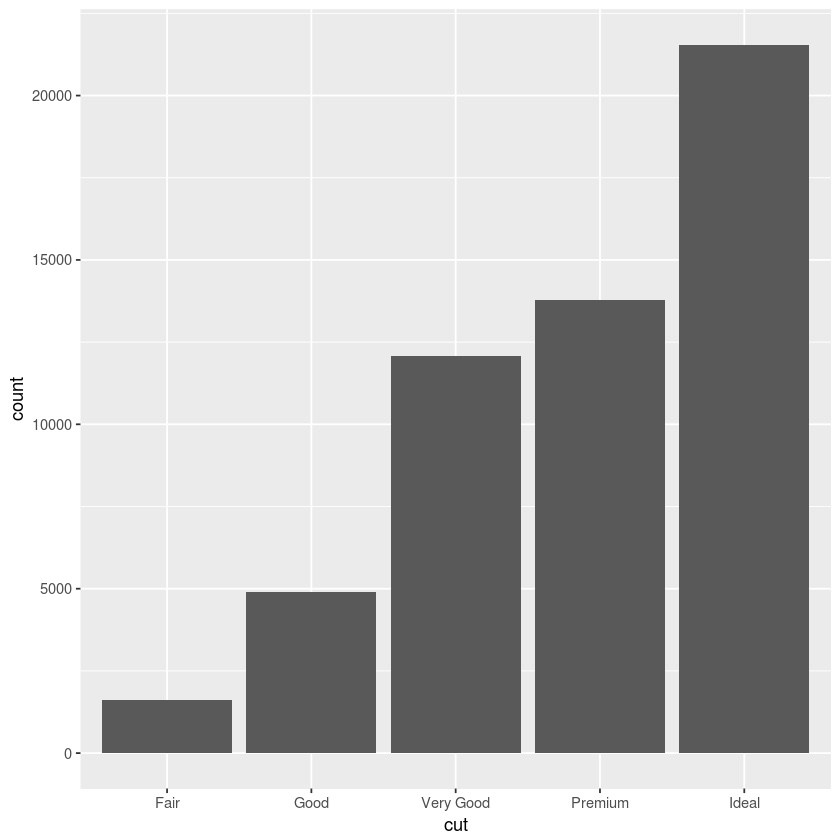

In [7]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))